Exercise 1.2

In [85]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 8.0/8.0 MB 51.1 MB/s eta 0:00:00
     ---------------------------------------- 219.8/219.8 kB ? eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 70.7 MB/s eta 0:00:00
     ---------------------------------------- 72.0/72.0 kB ? eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 81.7 MB/s eta 0:00:00
     ---------------------------------------- 107.7/107.7 kB ? eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:
import numpy as np
import math
import matplotlib.pyplot as plt

In our further analysis we want to compare with the analytical solution for D=1 and time points: 0.001, 0.01, 0.1, and 1. Hence, we set D=1. 

Discretize:

In [15]:
N = 50
delta_x = 1/50
delta_y = 1/50
discr_x = np.linspace(0, 1, N+1)
discr_y = np.linspace(0, 1, N+1)

delta_t = 1/10000


Check for stability of the, to be implemented, scheme: (using equation (8) of the assignment)

In [18]:
4*delta_t <= delta_x**2

True

Now, the program for the simulation of the two-dimensional time dependent diffusion
equation discretized using the explicit finite difference formulation from eq. (7):

In [75]:
def c_as_fun_of_(t): 
    c_old = np.zeros((N+1,N+1))
    c_old[50,:] = 1
    c_new = c_old.copy()
    theta = 0
    while theta < t:
        for i in range(1,N):
            for j in range(0,N+1):
                c_new[i,j] = c_old[i,j] + (delta_t/(delta_x**2))*(c_old[i,(j+1)%(N+1)] + c_old[i,(j-1)%(N+1)] + c_old[i-1,j] + c_old[i+1,j] - 4*c_old[i,j])
        c_old = c_new
        theta += delta_t
    return(c_new)

IK HEB MOEITE MET DE ANALYTICAL SOLUTION OP DE EEN OF ANDERE MANIER

Comparison to analytical solution:

In [80]:
def analytical_sol(y,t):
    c = 0
    for i in range(1,10000):
        summand = math.erfc((1-y+2*i)/(2*np.sqrt(t))) - math.erfc((1+y+2*i)/(2*np.sqrt(t)))
        c += summand
    return(c)

In [102]:

yyy = np.linspace(0,1,1000)
ccc_001 = [analytical_sol(y,0.01) for y in yyy]
ccc_01 = [analytical_sol(y,0.1) for y in yyy]
ccc_1 = [analytical_sol(y,1) for y in yyy]


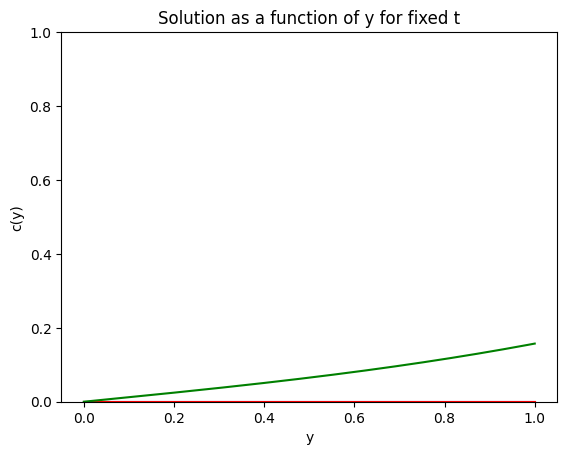

In [110]:

plt.plot(yyy,ccc_001, color = 'blue')
plt.plot(yyy,ccc_01, color = 'red')
plt.plot(yyy,ccc_1, color = 'green')
plt.ylim(0,1)
plt.xlabel('y')
plt.ylabel('c(y)')
plt.title("Solution as a function of y for fixed t")

plt.show()


VAN DE PLOT HIERBOVEN KLOPT DUIDELIJK NIETS

pick an arbitrary column because they are all the same anyway

In [122]:
c_num_0001 = c_as_fun_of_(0.001)[:,20] #pick an arbitrary column because they are all the same anyway
c_num_001 = c_as_fun_of_(0.01)[:,20]
c_num_01 = c_as_fun_of_(0.1)[:,20]
c_num_1 =c_as_fun_of_(1)[:,20]

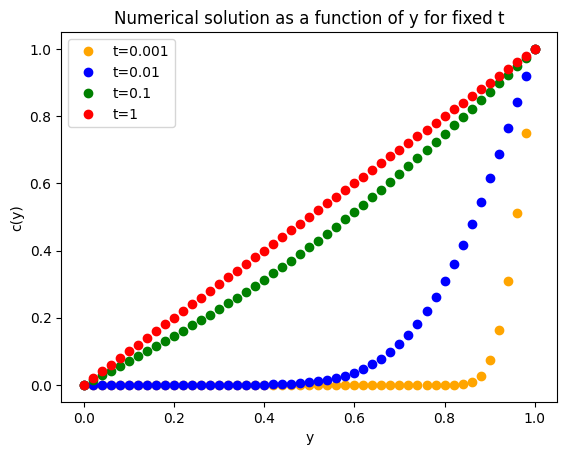

In [124]:
plt.plot(discr_y,c_num_0001,marker = 'o', linestyle="",color = 'orange', label = 't=0.001')
plt.plot(discr_y,c_num_001,marker = 'o', linestyle="",color = 'blue', label = 't=0.01')
plt.plot(discr_y,c_num_01,marker = 'o', linestyle="",color = 'green',label = 't=0.1')
plt.plot(discr_y,c_num_1,marker = 'o', linestyle="",color = 'red',label = 't=1')

plt.xlabel('y')
plt.ylabel('c(y)')
plt.title("Numerical solution as a function of y for fixed t")
plt.legend(loc = "upper left", )
plt.show()